## Výsledné vnitřní účinky - Příklad 2:

### Zadání:

Určete početně a graficky výsledné vnitřní účinky u prutu podle obrázku.

*Poznámka*: Příklad řeší úlohu diferenciálním způsobem, doporučuji si výsledné vytahy zkontrolovat výpočtem vedeným integrální cestou.

*Úkol*: *Odvoďte vztahy pro výsledné vnitřní účinky integrálním způsobem a srovnejte s výsledky uvedenými níže.*

Načtení nutných knihoven,

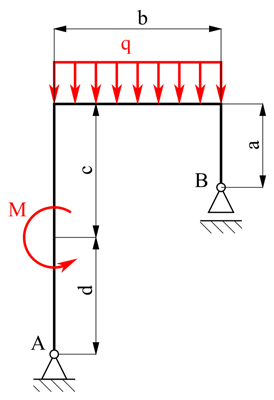

In [2]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image
Image(filename='ram2.png')

### Řešení:

Zavedení potřebných proměnných:

In [3]:
C1,C2,C3=sp.symbols('C1 C2 C3')
x1,x2,x3,x4=sp.symbols('x1 x2 x3 x4')
a,b,c,d=sp.symbols('a b c d')
M,FAy,FB,q=sp.symbols('M FAy FB q')
sp.init_printing()

Protože jde o prut na dvou podporách, musí se nejdříve určit reakce v obou vazbách s rovnic celkové statické rovnováhy. Vazba $A$ je vazba rotační, která se nahradí silovými složkami $F_{Ax}$ a $F_{Ay}$. Vazba $B$ je obecná vazba, které se nahradí složkou reakce $F_B$. Ze zadání plyne, že $F_{Ax}=0$, zbývající složky se určí z podmínek momentové rovnováhy k bodu $A$ a $B$,

\begin{eqnarray}
  \sum M_A: && F_Bb - \frac{qb^2}{2} + \mathcal{M}=0, \\
  \sum M_B: && -F_Ayb + \frac{qb^2}{2} + \mathcal{M}=0.
\end{eqnarray}

Tedy,

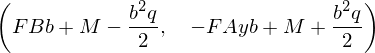

In [4]:
eq1=FB*b-q*b**2/2+M
eq2=-FAy*b+q*b**2/2+M
eq1,eq2

Soustava rovnic má řešeni,

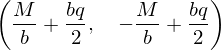

In [5]:
sol=sp.linsolve([eq1,eq2],[FAy,FB])
FAy,FB=next(iter(sol))
FAy,FB

Uvolňujeme *zleva*, takže *Schwedler*ovy vztahy mají klasický tvar:

\begin{eqnarray}
  \frac{\mathrm{d}N}{\mathrm{d}x}&=&0 \qquad \Rightarrow \qquad N=C_1, \\
  \frac{\mathrm{d}T}{\mathrm{d}x}&=&-q \qquad \Rightarrow \qquad T=-\int q\mathrm{d}x+C_2, \\
  \frac{\mathrm{d}M}{\mathrm{d}x}&=&T \qquad \Rightarrow \qquad M=\int T\mathrm{d}x+C_3.
\end{eqnarray}

Konstanty $C_1$, $C_2$ a $C_3$ se stanoví z okrajových podmínek a podmínek spojitosti průběhů *VVÚ*, tedy

$$
  N_i=N_{i-1},\quad T_i=T_{i-1}\quad \mathrm{a}\quad M_i=M_{i-1}.
$$

V případě přechodu přes zalomení prutu,

$$
  N_i=T_{i-1},\quad T_i=-N_{i-1}\quad\mathrm{a}\quad M_i=M_{i-1}.
$$

Index $i$ je číslo daného úseku.

**Úsek I:**

Délka úseku,
\begin{equation}
  x_1\in\left(0,d\right).
\end{equation}

Okrajové podmínky,
\begin{eqnarray}
  N_1(0)&=&F_{Ay}, \\
  T_1(0)&=&0, \\
  M_1(0)&=&0.
\end{eqnarray}

Vnitřní účinky mají na tomto úseku tvar,

In [6]:
N1=C1
T1=C2
M1=sp.integrate(T1,x1)+C3
N1,T1,M1

Okrajové podmínky na začátku úseku $1$ vedou na soustavu algebraických rovnic pro neznáme $C_1$, $C_2$ a $C_3$,

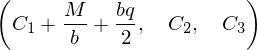

In [8]:
eq1=N1.subs(x1,0)+FAy
eq2=T1.subs(x1,0)
eq3=M1.subs(x1,0)
eq1,eq2,eq3

která má řešení,

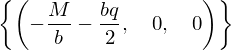

In [9]:
sol=sp.linsolve((eq1,eq2,eq3),(C1,C2,C3))
sol

Zpětné dosazení konstant $C_1$, $C_2$ a $C_3$ do $N_1(x_1)$, $T_1(x_1)$ a $M_1(x_1)$ se dostane,

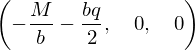

In [10]:
C1_solved,C2_solved,C3_solved=next(iter(sol))
N1_sol=N1.subs(C1,C1_solved)
T1_sol=T1.subs(C2,C2_solved)
M1_sol=M1.subs({C2:C2_solved,C3:C3_solved})
N1_sol,T1_sol,M1_sol

**Úsek II:**

Délka úseku,
\begin{equation}
  x_2\in\left(0,c\right).
\end{equation}

Okrajové podmínky,
\begin{eqnarray}
  N_2(0)&=&N_1(d), \\
  T_2(0)&=&T_1(d), \\
  M_2(0)&=&M_1(d)-\mathcal{M}.
\end{eqnarray}

Vnitřní výslednice mají v tomto případě tvar,

In [11]:
N2=C1
T2=C2
M2=sp.integrate(T2,x2)+C3
N2,T2,M2

Okrajové podmínky tohoto úseku vedou k soustavě algebraických rovnic pro neznámé $C_1$, $C_2$ a $C_3$,

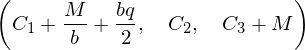

In [13]:
eq1=N2.subs(x2,0)-N1_sol.subs(x1,d)
eq2=T2.subs(x2,0)-T1_sol.subs(x1,d)
eq3=M2.subs(x2,0)-M1_sol.subs(x1,d)+M
eq1,eq2,eq3

která má řešení,

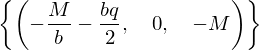

In [14]:
sol=sp.linsolve((eq1,eq2,eq3),(C1,C2,C3))
sol

Hodnoty $C_1$, $C_2$ a $C_3$ se dosadí do $N_2(x_2)$, $T_2(x_2)$ a $M_2(x_2)$ a dostanou se konečné výrazy pro vnitřní účinky na úseku $2$,

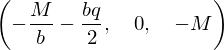

In [15]:
C1_solved,C2_solved,C3_solved=next(iter(sol))
N2_sol=N2.subs(C1,C1_solved)
T2_sol=T2.subs(C2,C2_solved)
M2_sol=M2.subs({C2:C2_solved,C3:C3_solved})
N2_sol,T2_sol,M2_sol

**Úsek III:**

Délka úseku,
\begin{equation}
  x_3\in\left(0,b\right).
\end{equation}

Okrajové podmínky,
\begin{eqnarray}
  N_3(0)&=&T_2(c), \\
  T_3(0)&=&-N_2(c), \\
  M_3(0)&=&M_2(c).
\end{eqnarray}

Podobně jako pro úseky $1$ a $2$ se dostanou vztahy pro $N_3(x_3)$, $T_3(x_3)$ a $M_3(x_3)$ v úseku $3$,

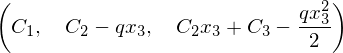

In [16]:
N3=C1
T3=-sp.integrate(q,x3)+C2
M3=sp.integrate(T3,x3)+C3
N3,T3,M3

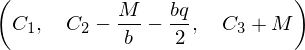

In [17]:
eq1=N3.subs(x3,0)-T2_sol.subs(x2,c)
eq2=T3.subs(x3,0)+N2_sol.subs(x2,c)
eq3=M3.subs(x3,0)-M2_sol.subs(x2,c)
eq1,eq2,eq3

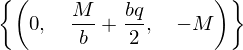

In [18]:
sol=sp.linsolve((eq1,eq2,eq3),(C1,C2,C3))
sol

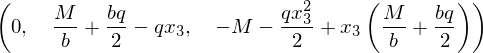

In [19]:
C1_solved,C2_solved,C3_solved=next(iter(sol))
N3_sol=N3.subs(C1,C1_solved)
T3_sol=T3.subs(C2,C2_solved)
M3_sol=M3.subs({C2:C2_solved,C3:C3_solved})
N3_sol,T3_sol,M3_sol

**Úsek IV:**

Délka úseku,
\begin{equation}
  x_4\in\left(0,a\right).
\end{equation}

Okrajové podmínky,
\begin{eqnarray}
  N_4(0)&=&T_3(b), \\
  T_4(0)&=&-N_3(b), \\
  M_4(0)&=&M_3(b).
\end{eqnarray}

Nakonec zbývájí $N_4(x_4)$, $T_4(x_4)$ a $M_4(x_4)$ podél úseku $x_4$,

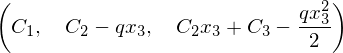

In [20]:
N4=C1
T4=C2
M4=sp.integrate(T4,x4)+C3
N3,T3,M3

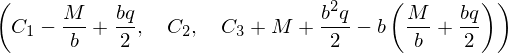

In [21]:
eq1=N4.subs(x4,0)-T3_sol.subs(x3,b)
eq2=T4.subs(x4,0)+N3_sol.subs(x3,b)
eq3=M4.subs(x4,0)-M3_sol.subs(x3,b)
eq1,eq2,eq3

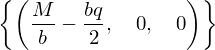

In [23]:
sol=sp.linsolve([eq1,eq2,eq3],[C1,C2,C3])
sol

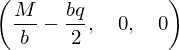

In [24]:
C1_solved,C2_solved,C3_solved=next(iter(sol))
N4_sol=N4.subs(C1,C1_solved)
T4_sol=T4.subs(C2,C2_solved)
M4_sol=M4.subs({C2:C2_solved,C3:C3_solved})
N4_sol,T4_sol,M4_sol

*Vykreslení výsledků*

Zvolené numerické hodnoty parametrů $a$, $b$, $c$ a $d$ a zatížení $|\boldsymbol{\mathcal{M}}|$ a $|\boldsymbol{q}|$,

In [25]:
a_,b_,c_,d_=1.,2.,3.,4.
M_,q_=1.,1.

Hodnoty $N(x)$, $T(x)$ a $M(x)$ na jednotlivých úsecích pro dané pole hodnot $x_1$, $x_2$, $x_3$ a $x_4$,

In [26]:
x1_=np.linspace(0,d_,20)
N1_plot=[N1_sol.subs({q:q_,M:M_,b:b_}) for ii in x1_]
T1_plot=[T1_sol.subs({q:q_,M:M_,b:b_}) for ii in x1_]
M1_plot=[M1_sol.subs({q:q_,M:M_,b:b_}) for ii in x1_]
x2_=np.linspace(0,c_,20)
N2_plot=[N2_sol.subs({q:q_,M:M_,b:b_}) for ii in x2_]
T2_plot=[T2_sol.subs({q:q_,M:M_,b:b_}) for ii in x2_]
M2_plot=[M2_sol.subs({q:q_,M:M_,b:b_,d:d_}) for ii in x2_]
x3_=np.linspace(0,b_,20)
N3_plot=[float(N3_sol.subs({q:q_,M:M_,b:b_})) for ii in x3_]
T3_plot=[float(T3_sol.subs({x3:ii,M:M_,q:q_,d:d_,c:c_,b:b_})) for ii in x3_]
M3_plot=[float(M3_sol.subs({M:M_,x3:ii,d:d_,c:c_,b:b_,q:q_})) for ii in x3_]
x4_=np.linspace(0,a_,20)
N4_plot=[float(N4_sol.subs({q:q_,M:M_,b:b_})) for ii in x4_]
T4_plot=[float(T4_sol.subs({x4:ii,M:M_,q:q_,d:d_,c:c_,b:b_})) for ii in x4_]
M4_plot=[float(M4_sol.subs({x4:ii,M:M_,q:q_,d:d_,c:c_,b:b_})) for ii in x4_]

Jednotlivé grafy spojíme:

In [40]:
x12,N12,T12,M12=[],[],[],[]
for ii in range(20):
  x12.append(x1_[ii])
  N12.append(float(N1_plot[ii]))
  T12.append(float(T1_plot[ii]))
  M12.append(float(M1_plot[ii]))
for ii in range(20):
  x12.append(x2_[ii]+d_)
  N12.append(float(N2_plot[ii]))
  T12.append(float(T2_plot[ii]))
  M12.append(float(M2_plot[ii]))

Vykreslení grafů:

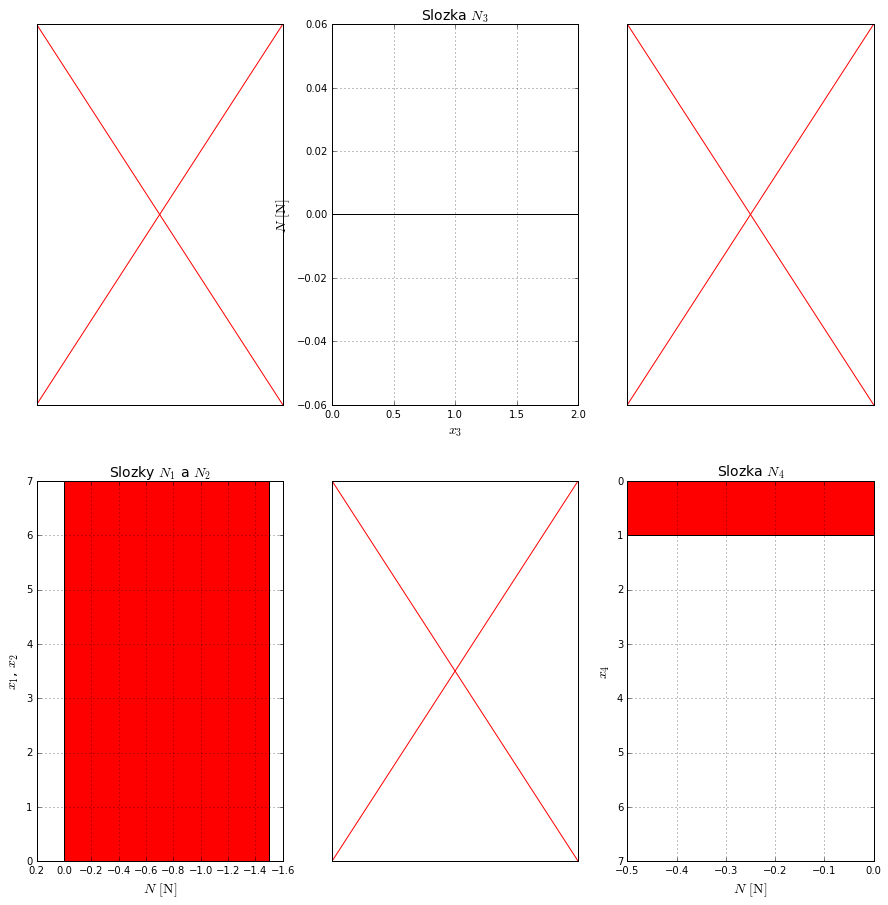

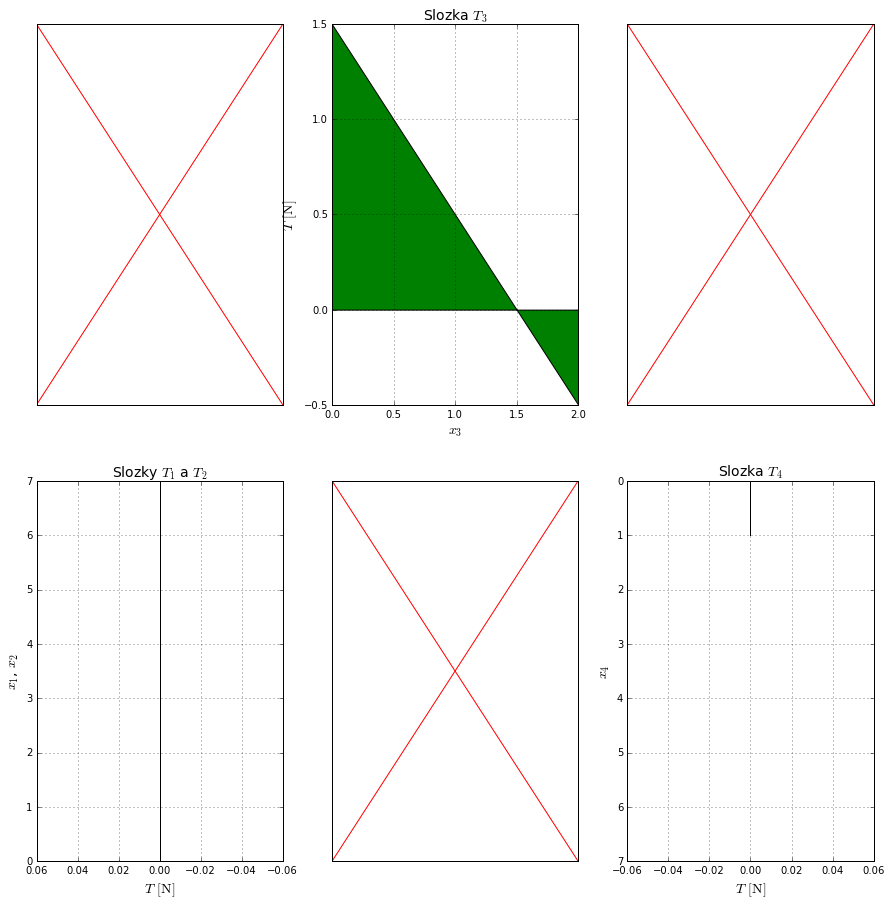

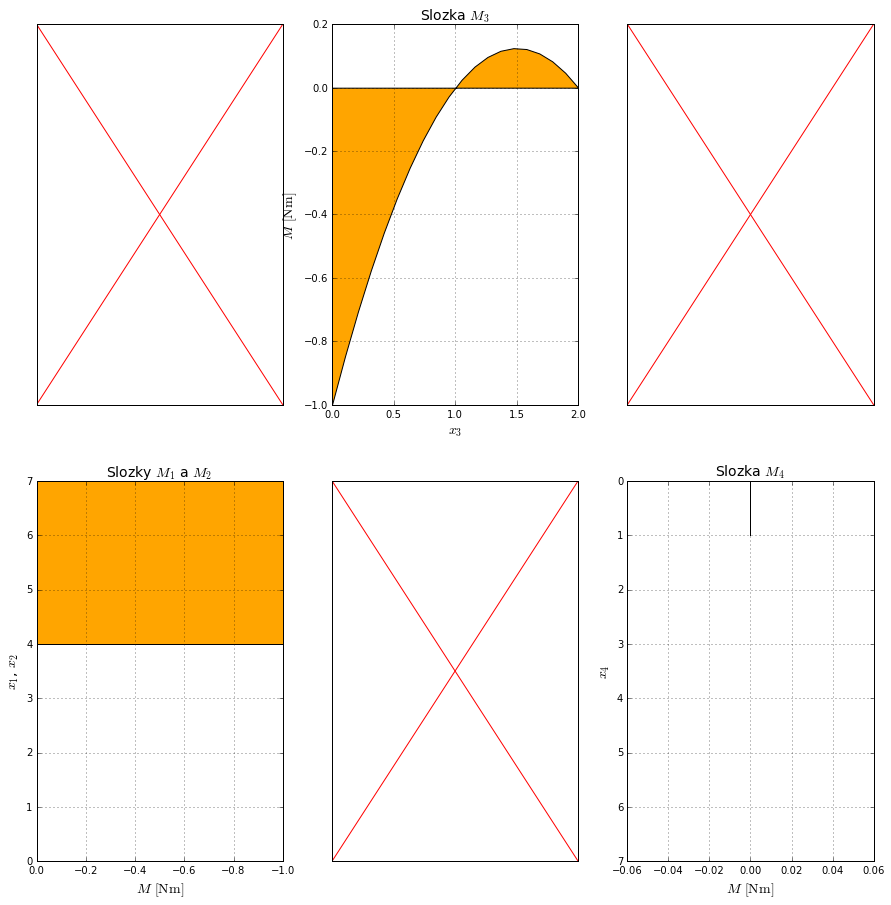

In [41]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(15,15))

ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax1.plot([0,1],[0,1],color="red")
ax1.plot([0,1],[1,0],color="red")
ax2.set_title('Slozka '+r'$N_3$').set_fontsize(14)
ax2.fill_between(x3_,0,N3_plot,facecolor='red')
ax2.set_xlabel(r'$x_3$').set_fontsize(14)
ax2.set_ylabel(r'$N$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax3.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax3.plot([0,1],[0,1],color="red")
ax3.plot([0,1],[1,0],color="red")
ax4.set_title('Slozky '+r'$N_1$'+' a '+r'$N_2$').set_fontsize(14)
ax4.fill_betweenx(x12,0,N12,facecolor='red')
ax4.set_ylabel(r'$x_1$'+', '+r'$x_2$').set_fontsize(14)
ax4.set_xlabel(r'$N$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax4.invert_xaxis()
ax5.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax5.plot([0,1],[0,1],color="red")
ax5.plot([0,1],[1,0],color="red")
ax6.set_title('Slozka '+r'$N_4$').set_fontsize(14)
ax6.fill_betweenx(x4_,0,N4_plot,facecolor='red')
ax6.set_ylabel(r'$x_4$').set_fontsize(14)
ax6.set_xlabel(r'$N$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax6.set_ylim((0,c_+d_))
ax6.invert_yaxis()
ax2.grid(True)
ax4.grid(True)
ax6.grid(True)

fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(15,15))

ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax1.plot([0,1],[0,1],color="red")
ax1.plot([0,1],[1,0],color="red")
ax2.set_title('Slozka '+r'$T_3$').set_fontsize(14)
ax2.fill_between(x3_,0,T3_plot,facecolor='green')
ax2.set_xlabel(r'$x_3$').set_fontsize(14)
ax2.set_ylabel(r'$T$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax3.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax3.plot([0,1],[0,1],color="red")
ax3.plot([0,1],[1,0],color="red")
ax4.set_title('Slozky '+r'$T_1$'+' a '+r'$T_2$').set_fontsize(14)
ax4.fill_betweenx(x12,0,T12,facecolor='green')
ax4.set_ylabel(r'$x_1$'+', '+r'$x_2$').set_fontsize(14)
ax4.set_xlabel(r'$T$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax4.invert_xaxis()
ax5.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax5.plot([0,1],[0,1],color="red")
ax5.plot([0,1],[1,0],color="red")
ax6.set_title('Slozka '+r'$T_4$').set_fontsize(14)
ax6.fill_betweenx(x4_,0,T4_plot,facecolor='green')
ax6.set_ylabel(r'$x_4$').set_fontsize(14)
ax6.set_xlabel(r'$T$'+' '+r'$\mathrm{[N]}$').set_fontsize(14)
ax6.set_ylim((0,c_+d_))
ax6.invert_yaxis()
ax2.grid(True)
ax4.grid(True)
ax6.grid(True)

fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(15,15))

ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax1.plot([0,1],[0,1],color="red")
ax1.plot([0,1],[1,0],color="red")
ax2.set_title('Slozka '+r'$M_3$').set_fontsize(14)
ax2.fill_between(x3_,0,M3_plot,facecolor='orange')
ax2.set_xlabel(r'$x_3$').set_fontsize(14)
ax2.set_ylabel(r'$M$'+' '+r'$\mathrm{[Nm]}$').set_fontsize(14)
ax3.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax3.plot([0,1],[0,1],color="red")
ax3.plot([0,1],[1,0],color="red")
ax4.set_title('Slozky '+r'$M_1$'+' a '+r'$M_2$').set_fontsize(14)
ax4.fill_betweenx(x12,0,M12,facecolor='orange')
ax4.set_ylabel(r'$x_1$'+', '+r'$x_2$').set_fontsize(14)
ax4.set_xlabel(r'$M$'+' '+r'$\mathrm{[Nm]}$').set_fontsize(14)
ax4.invert_xaxis()
ax5.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off',
    left='off',
    right='off',
    labelleft='off') # labels along the bottom edge are off
ax5.plot([0,1],[0,1],color="red")
ax5.plot([0,1],[1,0],color="red")
ax6.set_title('Slozka '+r'$M_4$').set_fontsize(14)
ax6.fill_betweenx(x4_,0,M4_plot,facecolor='orange')
ax6.set_ylabel(r'$x_4$').set_fontsize(14)
ax6.set_xlabel(r'$M$'+' '+r'$\mathrm{[Nm]}$').set_fontsize(14)
ax6.set_ylim((0,c_+d_))
ax6.invert_yaxis()
ax2.grid(True)
ax4.grid(True)
ax6.grid(True)